# EXPLORATORY DATA ANALYSIS

Context:
-----------

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." 

Content:
------------

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:
------------------------------------------------------------

Customers who left within the last month – the column is called Churn

Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

Demographic info about customers – gender, age range, and if they have partners and dependents

In [1]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#reading the file
df=pd.read_csv("telecom_customer_churn.csv")
pd.options.display.max_columns = 30 
pd.options.display.max_rows = None 


Context
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents


In [3]:
#first 5 rows are obtained
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#shape gives the no:of rows and columns
df.shape

(7043, 21)

In [5]:
#gives the general info about the dataset like the non-null counts and the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.dtypes
#total charges is seen to be object.

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
#shows the list of columns
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
#to find whether there is any null values for each column
df.isnull().sum()
#no null values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
#df.TotalCharges = df.TotalCharges.astype('float64')
#gives errors as this column is having spaces instead of null values .So need to convert to 0's and type cast accordingly

In [10]:
#showing the rows having spaces for the column total charges
df[df["TotalCharges"]==" "][["TotalCharges"]]


,TotalCharges
488,
753,
936,
1082,
1340,
3331,
3826,
4380,
5218,
6670,


In [11]:
# Replacing the mssing value into 0 and converting the object into float value.
df['TotalCharges'] = df['TotalCharges'].replace(" ", 0).astype('float32')

In [12]:
#checking whether the column is converted into float type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
#summary of numerical columns
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.732178
std,0.368612,24.559481,30.090047,2266.794434
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.549988
50%,0.000000,29.000000,70.350000,1394.550049
75%,0.000000,55.000000,89.850000,3786.599976
max,1.000000,72.000000,118.750000,8684.799805


In [14]:
#summary of categorical columns
df.describe(include = object)

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,5028-GZLDO,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [15]:
#The columns having "No internet service" are replaced to "No"
#The column "MultipleLines" having "No phone service" are replaced to "No"

replace_cols=["OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]
for i in replace_cols:
    df[i]  = df[i].replace('No internet service' , 'No')
df["MultipleLines"]=df["MultipleLines"].replace("No phone service","No")

In [16]:
#to check if duplicated rows are present
df.duplicated().sum()

0

In [17]:
y = pd.crosstab(df["Churn"],columns = "Frequency")
print(y)
#no: of customers churned = 1869
#no: of customers not churned = 5174

col_0  Frequency
Churn           
No          5174
Yes         1869


col_0  Frequency
Churn           
No         73.46
Yes        26.54


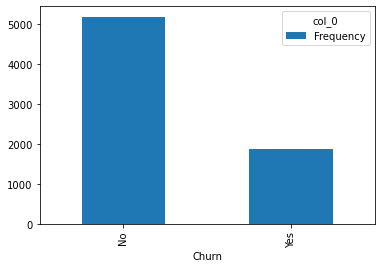

In [18]:
#bar plot showing the customers who churned and who didn't
y_bar = y.plot(kind="bar")
y_percent = y/len(df)*100
print(round(y_percent,2))
#27% churned
#73% not churned

In [19]:
#categorical columns and numerical columns
categorical_cols = ["gender","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod","Churn"]
numerical_cols = ["SeniorCitizen","tenure","MonthlyCharges","TotalCharges"]


# Hypothesis Generation

Possible Questions or variables to be checked:

1)tenure - which category of people (people with high tenure or low tenure) are getting churned.We need to know if recently joining cstomers are churning or not

2)MonthlyCharges - if the monthly charges are high, there is a chance for churning.We need to analyse whether monthly charges are high or not

3)TotalCharges - Same as monthly charge, total charge should increase accoding to monthly charges

4)SeniorCitizen - need to check whether senior citizens are more tending to churn

5)PaymentMethod - to check whether payment method is creating any transaction issues which is causing churning.Which among them is causing issue

6)PaperlessBilling - to see how many customers using paperless billing and analyse it with respect to churning 

7)There are multiple services that company is providing like phone,internet,multiple lines, etc.check which particular service or which all services is giving more churning

**KDE PLOT on tenure, MonthlyCharges and TotalCharges.**

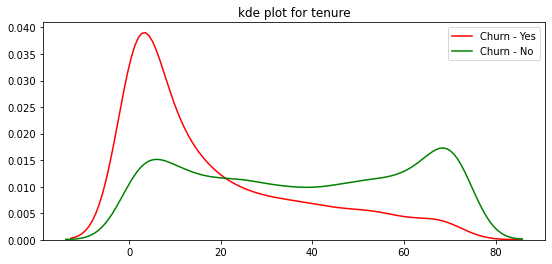

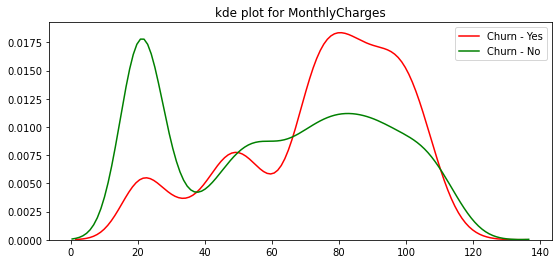

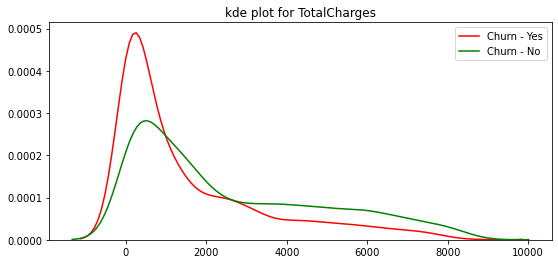

In [20]:
"""
checking the churn status of other numerical fields using kde plot
we can see that recent joiners have a churning tendency more and high monthly charges leads to churning
"""
def kde(feature):
    plt.figure(figsize=(9,4))
    plt.title("kde plot for {}".format(feature))
    ax0=sns.kdeplot(df[df["Churn"]=="Yes"][feature],color="red",label= "Churn - Yes")
    ax1=sns.kdeplot(df[df["Churn"]=="No"][feature],color="green",label="Churn - No")
kde("tenure")
kde("MonthlyCharges")
kde("TotalCharges")

# Tenure

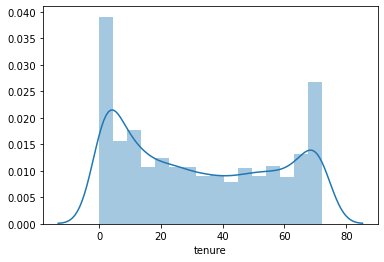

In [21]:
#Univariate Analysis
#histogram
sns.distplot(df["tenure"])

In [22]:
# there is a good no: of people with less than 10 months of tenure approximately 26%
df[df["tenure"]<10]["tenure"].count()/len(df)*100

26.32400965497657

In [23]:
#summary of tenure
df["tenure"].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [24]:
#dividing tenure into 3 categories for further analysisanalysis
#tenure>=60 months-->highest
#tenure 20 to 60 months-->medium
#tenure 0 to 20 months--->lowest
df["tenure_groups"] = np.where(df["tenure"]>=60,"highest",np.where(df["tenure"]<20,"lowest","medium"))

col_0,frequency
tenure_groups,
highest,1483
lowest,2807
medium,2753


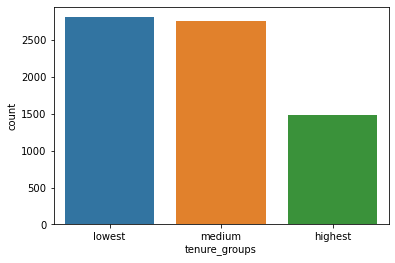

In [25]:
sns.countplot(df["tenure_groups"],data=df)
pd.crosstab(df["tenure_groups"],columns="frequency")

---------------------------------------------------------------------------------------------------------------------------
The proportion of churning in different tenure groups namley lowest,medium and highest in the order of their tenure period is: 
---------------------------------------------------------------------------------------------------------------------------
Churn            No   Yes
tenure_groups            
highest        93.0   7.0
lowest         56.0  44.0
medium         80.0  20.0


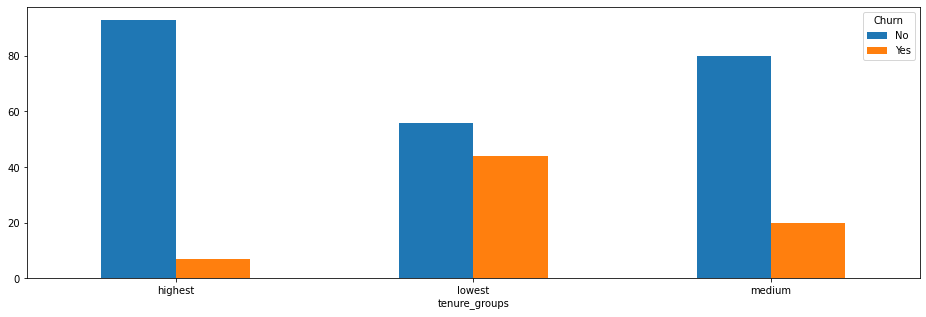

In [26]:
#Multivariate Analysis
#checking which tenure period gives more churning.Around 44% among the lowest tenure group has churned
tenure_Crosstab = pd.crosstab(df.tenure_groups, columns=df.Churn)
row_tot = tenure_Crosstab.sum(axis=1)
tenure_Crosstab_prop = round(tenure_Crosstab.div(row_tot,axis=0)*100)
print("---------------------------------------------------------------------------------------------------------------------------")
print("The proportion of churning in different tenure groups namley lowest,medium and highest in the order of their tenure period is: ")
print("---------------------------------------------------------------------------------------------------------------------------")
print(tenure_Crosstab_prop)
tenure_Crosstab_prop.plot(kind = 'bar' ,rot=0 , figsize = [16,5])

#lowest tenure period gives more churning

**tenure vs Monthly charges and total charges**

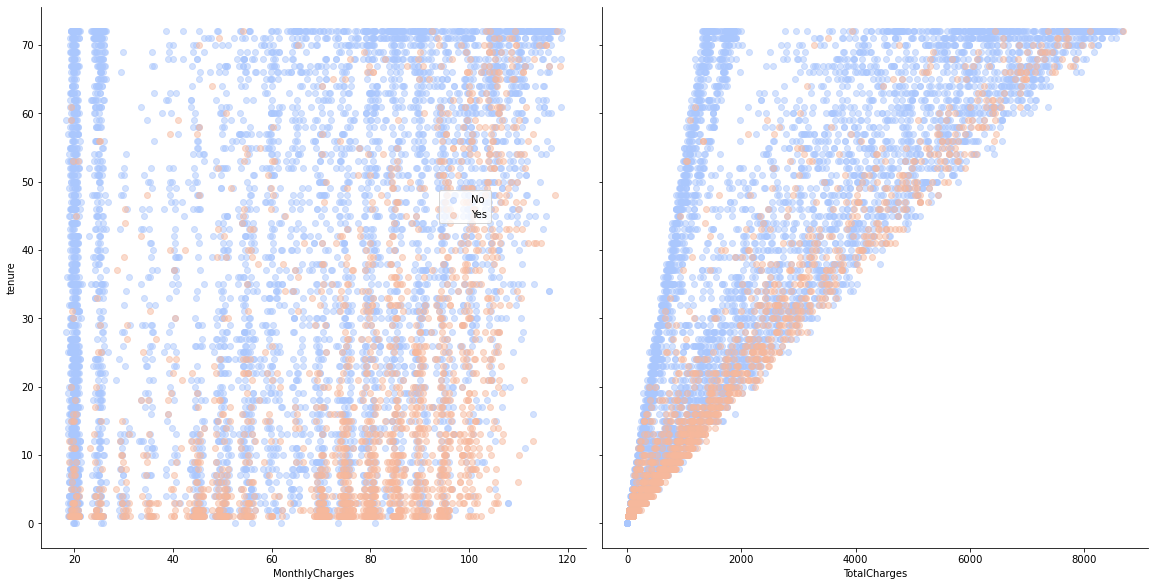

In [27]:
#as tenure is less and monthly or total charges increases, churning happens
g=sns.PairGrid(df,x_vars=["MonthlyCharges","TotalCharges"],y_vars="tenure",hue="Churn",palette="coolwarm",height=8)
g.map(plt.scatter,alpha=0.5)
plt.legend(loc=(-0.3,0.6))

**Summary:
low tenure is a reason for churning.This means that new joining customers are getting churned.**

# MonthlyCharges

In [28]:
#univarate analysis
#summary of Monthly Charges
df["MonthlyCharges"].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

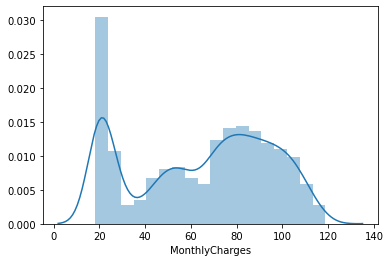

In [29]:
#histogram showing the distribution of monthly charges
sns.distplot(df["MonthlyCharges"])

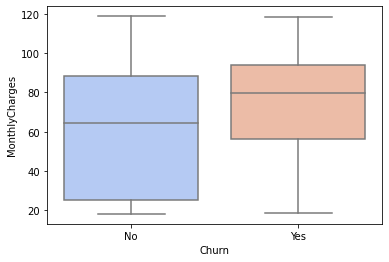

In [30]:
#we can see that as monthly charges increases, churning increases
sns.boxplot(x="Churn",y="MonthlyCharges",data=df,palette="coolwarm")

**Monthly Charges vs Multiple Lines**

In [31]:
df.MultipleLines.value_counts()

No     4072
Yes    2971
Name: MultipleLines, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


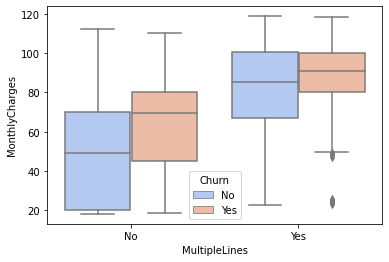

In [32]:
"""
multiple lines with high monthly charges is showing high churning rate.
Whether or not the person has multiple lines, if he has high monthly charges, he has a tendency to churn.

"""
print(sns.boxplot(x="MultipleLines",y="MonthlyCharges",hue="Churn",data=df,palette="coolwarm"))

**Monthly Charges vs Internet Service**

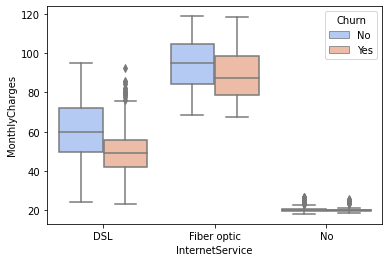

In [33]:
#Fibre optic services have a high monthly charge when compared to others and so is the churn rate
sns.boxplot(x="InternetService",y="MonthlyCharges",hue="Churn",data=df,palette="coolwarm")

**Monthly Charges vs Phone Service**

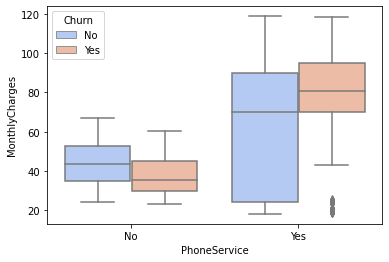

In [34]:
#churning is there for people having phone service and high monthly charges
sns.boxplot(x="PhoneService",y="MonthlyCharges",hue="Churn",data=df,palette="coolwarm")

**Monthly Charges vs Total Charges**

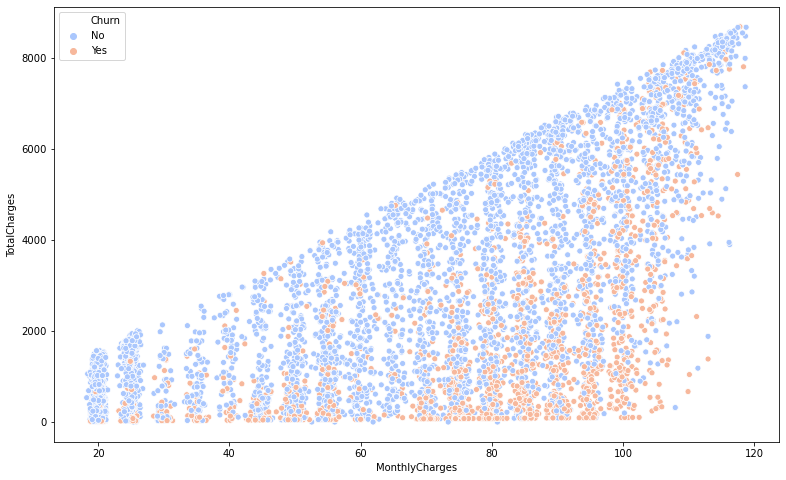

In [35]:
plt.figure(figsize=(13,8))
sns.scatterplot(x="MonthlyCharges",y="TotalCharges",data = df,palette="coolwarm",hue = "Churn")
# using monthly charges for further analysis instead of total charges as both are proportional and taking anyone of this would be only required 

**Summary:As monthly charges and total charges increases, churning increases**

# Senior Citizen

col_0,frequency
SeniorCitizen,
0,5901
1,1142


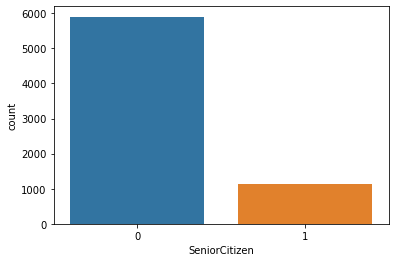

In [36]:
#We can infer that there are less senior citizen people(1142 senior citizens) joined when compared to youngsters
sns.countplot(x="SeniorCitizen",data=df)
pd.crosstab(df["SeniorCitizen"],columns="frequency")

------------------------------------------------------------------------------------
Percentage of people who got attrited among the senior citizen and youngsters: 
------------------------------------------------------------------------------------
Churn            No   Yes
SeniorCitizen            
0              76.0  24.0
1              58.0  42.0


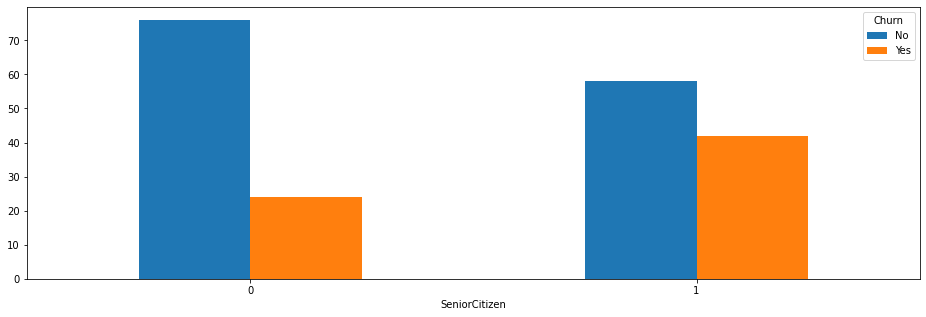

In [37]:
#here among the senior citzens,around 42% has churned where as youngsters have churned less(among youngsters, 24% only churned)
SeniorCitizen_Crosstab = pd.crosstab(df.SeniorCitizen, columns=df.Churn)
row_tot = SeniorCitizen_Crosstab.sum(axis=1)
print("------------------------------------------------------------------------------------")
SeniorCitizen_Crosstab_prop = round(SeniorCitizen_Crosstab.div(row_tot,axis=0)*100)
print("Percentage of people who got attrited among the senior citizen and youngsters: ")
print("------------------------------------------------------------------------------------")
print(SeniorCitizen_Crosstab_prop)
SeniorCitizen_Crosstab_prop.plot(kind = 'bar' ,rot=0 , figsize = [16,5])

In [38]:
#senior citizen vs payment method

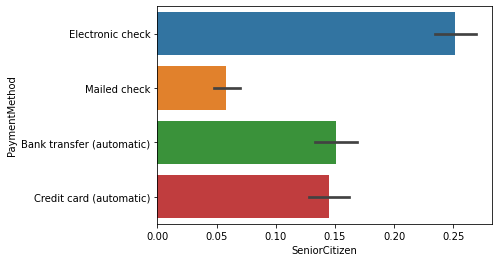

In [39]:
#senior citizens have opted electronic check more when compared to other payment methods.
#So we need to know if there was any issue regarding electronic check
sns.barplot(x="SeniorCitizen",y="PaymentMethod",data=df)

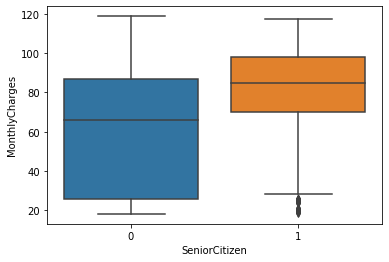

In [40]:
#The average monthly charges were around 90 dollars for senior citizens who have churned
#whereas the average is less for people who haven't churned around 65 dollars
sns.boxplot(x="SeniorCitizen",y="MonthlyCharges",data=df)

**Summary:
    Senior citizens are comparitively very less.ie, around 16%.Among these 16%, around 48% are churned .
    When checked their monthly charges, it looks comparitively higher for people who churned among the senior citizens
    Also, the payment method used was electronic check.We need to further analyse whether electronic check is creating an issue for them causing churning**

# All other services including:
**OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies**


<Figure size 432x288 with 0 Axes>

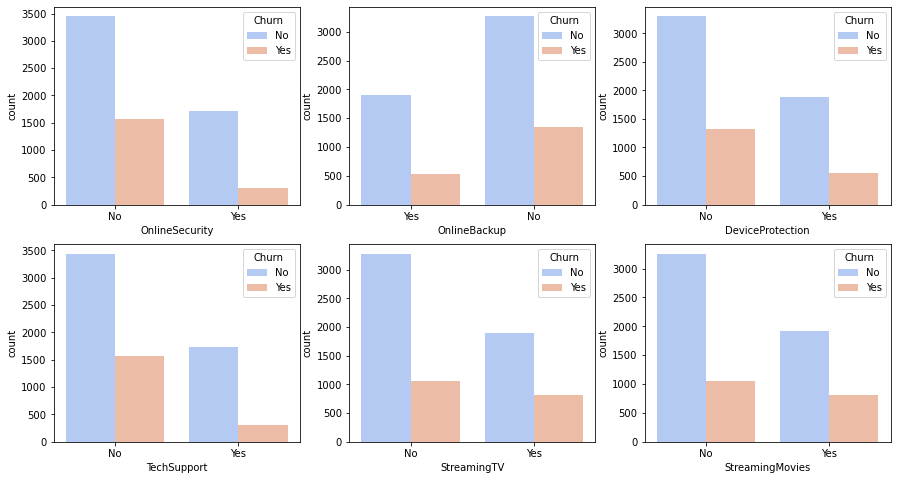

In [41]:
replace_cols=['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
'StreamingTV', 'StreamingMovies']

#To display these columns together with subplots using for loop

x=0
y=0
num=0
plt.tight_layout()
fig, axes =plt.subplots(2,3,figsize=(15,8))
for x in range(2):
    for y in range(3):
        sns.countplot(x=replace_cols[num],data=df,hue = "Churn",ax=axes[x,y],palette="coolwarm")
        num +=1
#for people who have opted the services, the churning rate(shown in pink) is not higher with respect to the 
#churning rate of people who haven't opted in an overall view

In [42]:
#univariate crosstab
df_service=df[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
'StreamingTV', 'StreamingMovies']]
#def crosstab(df_service):

for idx, variable in enumerate(df_service.columns):
    #univariate crosstab
    other_services_Crosstab = pd.crosstab(df_service[variable],columns = df.Churn)
    row_tot = other_services_Crosstab.sum(axis=1)
    other_services_Crosstab_prop = round(other_services_Crosstab.div(row_tot,axis=0)*100)
    print("Showing the percentage of churn happened for people opting {}".format(variable))
    print("-----------------------------------------------------------------------------------")
    print(other_services_Crosstab_prop)
    print("-----------------------------------------------------------------------------------")
#churn yes and service yes is checked here
#for people who have opted the services, the churning rate is not higher as expected


Showing the percentage of churn happened for people opting OnlineSecurity
-----------------------------------------------------------------------------------
Churn             No   Yes
OnlineSecurity            
No              69.0  31.0
Yes             85.0  15.0
-----------------------------------------------------------------------------------
Showing the percentage of churn happened for people opting OnlineBackup
-----------------------------------------------------------------------------------
Churn           No   Yes
OnlineBackup            
No            71.0  29.0
Yes           78.0  22.0
-----------------------------------------------------------------------------------
Showing the percentage of churn happened for people opting DeviceProtection
-----------------------------------------------------------------------------------
Churn               No   Yes
DeviceProtection            
No                71.0  29.0
Yes               77.0  23.0
----------------------------------

**Summary:**
    
**As the churning rate is less for yes category of the services, we consider this to be not effecting churning**

# Contract

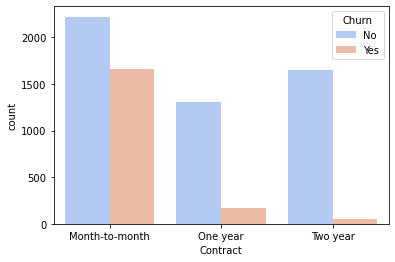

In [43]:
#people with monthly contract showing high churning rate.
sns.countplot(x="Contract",data=df,hue="Churn",palette="coolwarm")

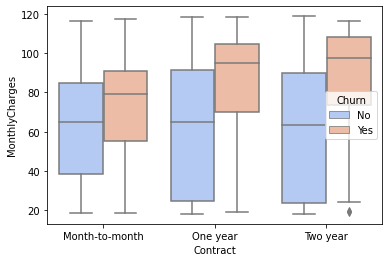

In [44]:
#monthly charges is high for for all kind of contracts 
sns.boxplot(x="Contract",y="MonthlyCharges",hue="Churn",data=df,palette="coolwarm")

**summary:Month to month contract gives churning.The reason might be they can leave the service if they are not interested.So people thinking that in mind might have chosen monthly contract.Churning is very low for one year and two year contract even if the monthly charges are high**

# PaperlessBilling

In [45]:
#around 60% of the customers have chosen paperless billing
round(pd.crosstab(df.PaperlessBilling,columns="frequency")/len(df)*100,2)

col_0,frequency
PaperlessBilling,
No,40.78
Yes,59.22


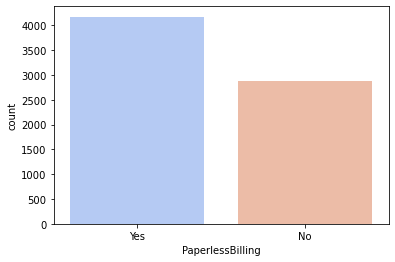

In [46]:
sns.countplot(x="PaperlessBilling",data=df,palette="coolwarm")

Among the people who chose paperless billing 34 % are churned
Among the people who didn't choose paperless billing 16 % are only churned


count
PaperlessBilling Churn       
No               No      2403
                 Yes      469
Yes              No      2771
                 Yes     1400

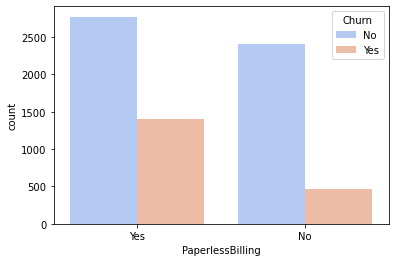

In [47]:
"""
Churn rate is more for people opted paperless billing.
"""
sns.countplot(x="PaperlessBilling",hue="Churn",data=df,palette="coolwarm")
print("Among the people who chose paperless billing",round(1400/(1400+2771)*100),"% are churned")
print("Among the people who didn't choose paperless billing",round(469/(469+2403)*100),"% are only churned")
df.groupby(["PaperlessBilling","Churn"])["PaperlessBilling"].agg(["count"])


**Summary:Paperless billing is very common for customers and people opted this are having high churning**

# Payment Method

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

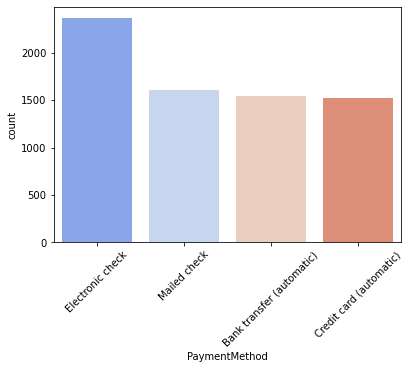

In [48]:
#Checking the count of different payment methods
print(df["PaymentMethod"].value_counts())

sns.countplot(x="PaymentMethod",data=df,palette="coolwarm")
plt.tight_layout()
plt.xticks(rotation=45)
#electronic check is more used

Percentage of people who got attrited among the senior citizen and youngsters: 
Churn                        No   Yes
PaymentMethod                        
Bank transfer (automatic)  83.0  17.0
Credit card (automatic)    85.0  15.0
Electronic check           55.0  45.0
Mailed check               81.0  19.0


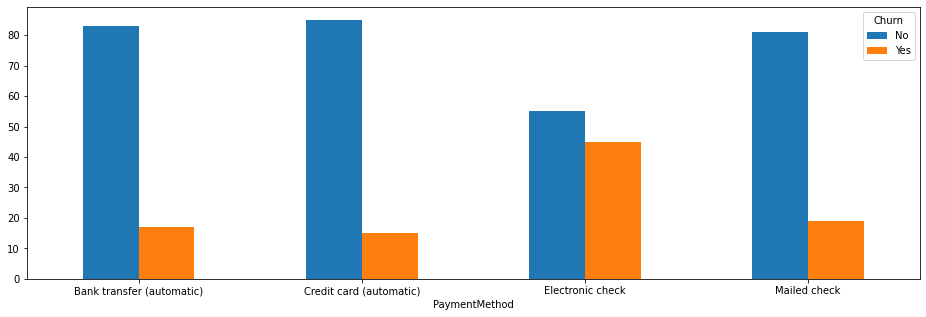

In [49]:

PaymentMethod_Crosstab = pd.crosstab(df.PaymentMethod, columns=df.Churn)
row_tot = PaymentMethod_Crosstab.sum(axis=1)
PaymentMethod_Crosstab_prop = round(PaymentMethod_Crosstab.div(row_tot,axis=0)*100)
print("Percentage of people who got attrited among the senior citizen and youngsters: ")
print(PaymentMethod_Crosstab_prop)
PaymentMethod_Crosstab_prop.plot(kind = 'bar' ,rot=0 , figsize = [16,5])


#Electronic check payment method is giving more churning.

#among the people who have opted electronic check, around 45% are churned

**Summary:Electronic check is causing more churning of customers even if it is more preferred.This might be because of loading issues due to traffic or there might be other complaints.**

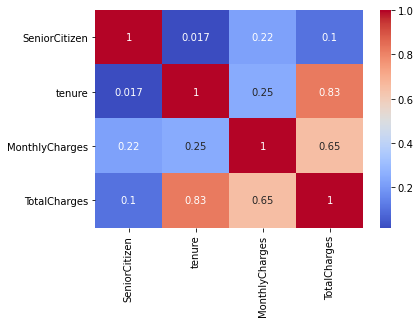

In [50]:
#Using a heatmap to find the correlation between the numerical columns
tc=df.corr()
sns.heatmap(tc,xticklabels=True,annot=True,cmap="coolwarm")
#here we see tenure and monthly charges show the highest churning

# Overall Summary

Variables causing Churning:

1)tenure

2)Monthly Charges

3)Total Charges

4)Internet Service-Fibre optic service

5)Senior Citizen due to monthly charges and payment method which is electronic check

6)payment method-electronic check

7)Contract-Month to Month

6)PaperlessBilling